links 
https://www.kaggle.com/code/gunhee/find-patterns-using-gradient-boosting

https://www.kaggle.com/code/ricardoikedo/modelo-de-regress-o-linear-m-ltipla-precifica-o

https://www.kaggle.com/datasets/gunhee/koreahousedata

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


mpl.style.use('ggplot')

In [3]:
df = pd.read_csv("Daegu_Real_Estate_data.csv")
df.head()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0


In [4]:
df.shape

(5891, 30)

In [5]:
df.dtypes

SalePrice                               int64
YearBuilt                               int64
YrSold                                  int64
MonthSold                               int64
Size(sqf)                               int64
Floor                                   int64
HallwayType                            object
HeatingType                            object
AptManageType                          object
N_Parkinglot(Ground)                  float64
N_Parkinglot(Basement)                float64
TimeToBusStop                          object
TimeToSubway                           object
N_APT                                 float64
N_manager                             float64
N_elevators                           float64
SubwayStation                          object
N_FacilitiesNearBy(PublicOffice)      float64
N_FacilitiesNearBy(Hospital)            int64
N_FacilitiesNearBy(Dpartmentstore)    float64
N_FacilitiesNearBy(Mall)              float64
N_FacilitiesNearBy(ETC)           

In [6]:
cols = df.columns
print(cols)

Index(['SalePrice', 'YearBuilt', 'YrSold', 'MonthSold', 'Size(sqf)', 'Floor',
       'HallwayType', 'HeatingType', 'AptManageType', 'N_Parkinglot(Ground)',
       'N_Parkinglot(Basement)', 'TimeToBusStop', 'TimeToSubway', 'N_APT',
       'N_manager', 'N_elevators', 'SubwayStation',
       'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(Hospital)',
       'N_FacilitiesNearBy(Dpartmentstore)', 'N_FacilitiesNearBy(Mall)',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(Park)',
       'N_SchoolNearBy(Elementary)', 'N_SchoolNearBy(Middle)',
       'N_SchoolNearBy(High)', 'N_SchoolNearBy(University)',
       'N_FacilitiesInApt', 'N_FacilitiesNearBy(Total)',
       'N_SchoolNearBy(Total)'],
      dtype='object')


- **SalePrice**: Preço de venda
- **YearBuilt**: Ano de construção
- **YrSold**: Ano de venda
- **MonthSold**: Mês de venda
- **Size(sqf)**: Tamanho (pés quadrados)
- **Floor**: Andar
- **HallwayType**: Tipo de corredor
- **HeatingType**: Tipo de aquecimento
- **AptManegeType**: Tipo de gerenciamento
- **N_Parkinglot(Ground)**: Número de estacionamentos (térreo)
- **N_Parkinglot(Basement)**: Número de estacionamentos (subterrâneo)
- **TimeToBusStop**: Tempo até uma parada de ônibus
- **TimeToSubway**: Tempo até estação de metrô
- **N_APT**: não identificado até o momento
- **N_manager**: Número de gerentes
- **N_elevators**: Número de elevadores
- **SubwayStation**: Estação de metro próxima
- **N_FacilitiesNearBy(PublicOffice)**: Núm. de facilitadores próximos (escritório)
- **N_FacilitiesNearBy(Hospital)**: Núm. de facilitadores próximos (hospital)
- **N_FacilitiesNearBy(Dpartmentstore)** Núm. de facilitadores próximos (Lojas de departamento)
- **N_FacilitiesNearBy(Mall)**: Núm. de facilitadores próximos (Shopping)
- **N_FacilitiesNearBy(ETC)**: Núm. de facilitadores próximos (ETC/outros)
- **N_FacilitiesNearBy(Park)**: Núm. de facilitadores próximos (Parque)
- **N_SchoolNearBy(Elementary)**: Núm. de escolas próximas (primária)
- **N_SchoolNearBy(Middle)**: Núm. de escolas próximas (fundamental)
- **N_SchoolNearBy(High)**: Núm. de escolas próximas (médio)
- **N_SchoolNearBy(University)**: Núm. de escolas próximas (Universidades)
- **N_FacilitiesInApt**: Núm. de facilidades no apartamento (?)
- **N_FacilitiesNearBy(Total)**: Núm. de facilitadores próximos (total)
- **N_SchoolNearBy(Total)**: Núm. de escolas próximas (total)

In [9]:
df.isnull().sum().sort_values(ascending=False)

SalePrice                             0
YearBuilt                             0
N_FacilitiesNearBy(Total)             0
N_FacilitiesInApt                     0
N_SchoolNearBy(University)            0
N_SchoolNearBy(High)                  0
N_SchoolNearBy(Middle)                0
N_SchoolNearBy(Elementary)            0
N_FacilitiesNearBy(Park)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(PublicOffice)      0
SubwayStation                         0
N_elevators                           0
N_manager                             0
N_APT                                 0
TimeToSubway                          0
TimeToBusStop                         0
N_Parkinglot(Basement)                0
N_Parkinglot(Ground)                  0
AptManageType                         0
HeatingType                           0
HallwayType                           0


In [11]:
df.describe()

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
count,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,...,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000,5891.000000
mean,221218.112545,2002.967408,2012.691563,6.160244,955.569173,12.026311,195.883551,570.761670,5.613648,6.310304,...,0.941436,1.941266,0.654218,3.022407,2.417756,2.659311,2.764726,5.809540,9.870820,10.864200
std,106384.186446,8.811782,2.905488,3.387752,382.464050,7.548743,218.597210,408.621075,2.811831,3.174088,...,0.401355,2.201392,0.658320,0.954575,1.037898,1.556041,1.489289,2.330804,3.450319,4.438513
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,144247.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,11.000000,184.000000,3.000000,5.000000,...,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000
50%,207964.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,100.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000
75%,291150.000000,2008.000000,2015.000000,9.000000,1149.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,1.000000,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,2.000000,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000


In [133]:
for col in cols:
    print(f"{col} : {len(df[col].unique())}")

SalePrice : 949
YearBuilt : 16
YrSold : 11
MonthSold : 12
Size(sqf) : 92
Floor : 43
HallwayType : 3
HeatingType : 2
AptManageType : 2
N_Parkinglot(Ground) : 23
N_Parkinglot(Basement) : 20
TimeToBusStop : 3
TimeToSubway : 5
N_APT : 9
N_manager : 9
N_elevators : 13
SubwayStation : 8
N_FacilitiesNearBy(PublicOffice) : 8
N_FacilitiesNearBy(Hospital) : 3
N_FacilitiesNearBy(Dpartmentstore) : 3
N_FacilitiesNearBy(Mall) : 3
N_FacilitiesNearBy(ETC) : 4
N_FacilitiesNearBy(Park) : 3
N_SchoolNearBy(Elementary) : 5
N_SchoolNearBy(Middle) : 5
N_SchoolNearBy(High) : 6
N_SchoolNearBy(University) : 6
N_FacilitiesInApt : 9
N_FacilitiesNearBy(Total) : 11
N_SchoolNearBy(Total) : 14


In [134]:
categoricas = ['HallwayType','HeatingType','AptManageType',
               'TimeToBusStop','TimeToSubway','SubwayStation']

In [135]:
numericas = df.drop(columns=categoricas, axis=1).columns

In [136]:
len(categoricas), len(numericas)

(6, 24)

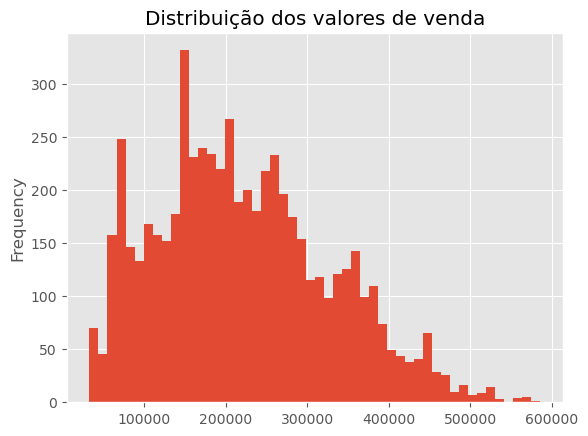

In [137]:
df['SalePrice'].plot(kind='hist',bins=50)
plt.title('Distribuição dos valores de venda')
plt.show()

In [138]:
for cat in categoricas:
    print(cat)

HallwayType
HeatingType
AptManageType
TimeToBusStop
TimeToSubway
SubwayStation


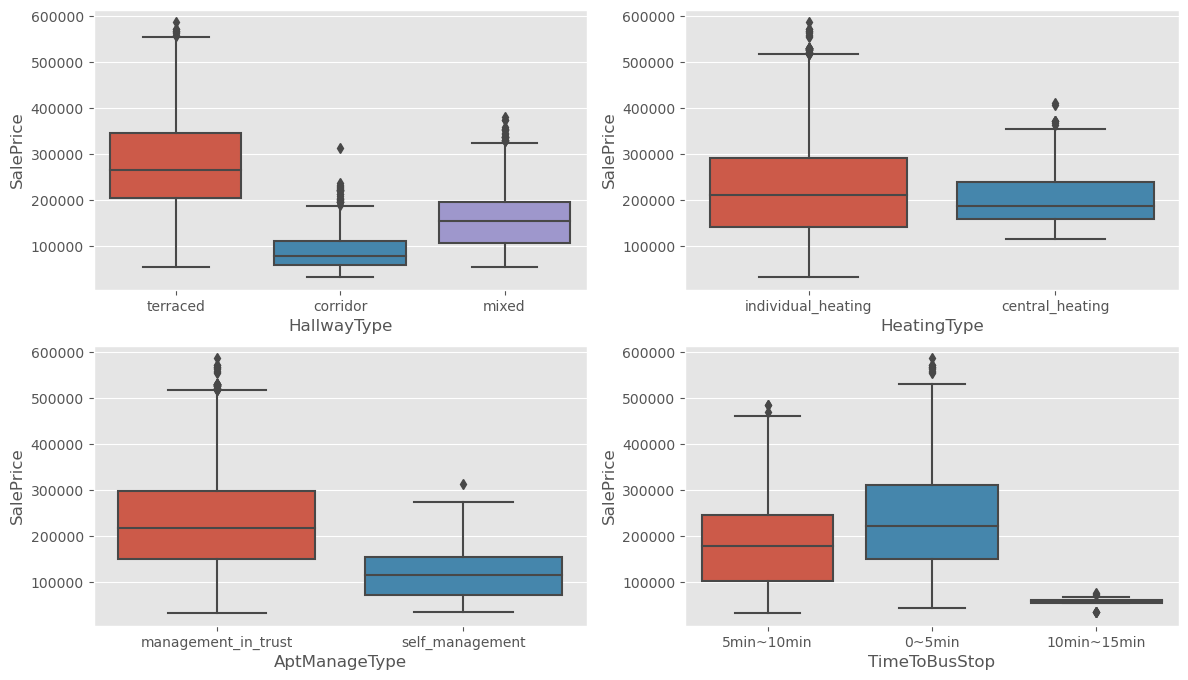

In [139]:
fig, axes = plt.subplots(2,2,figsize=(14,8))
sns.boxplot(data=df, x='HallwayType', y='SalePrice', ax=axes[0][0])
sns.boxplot(data=df, x='HeatingType', y='SalePrice', ax=axes[0][1])
sns.boxplot(data=df, x='AptManageType', y='SalePrice', ax=axes[1][0])
sns.boxplot(data=df, x='TimeToBusStop', y='SalePrice',ax=axes[1][1])
plt.show()

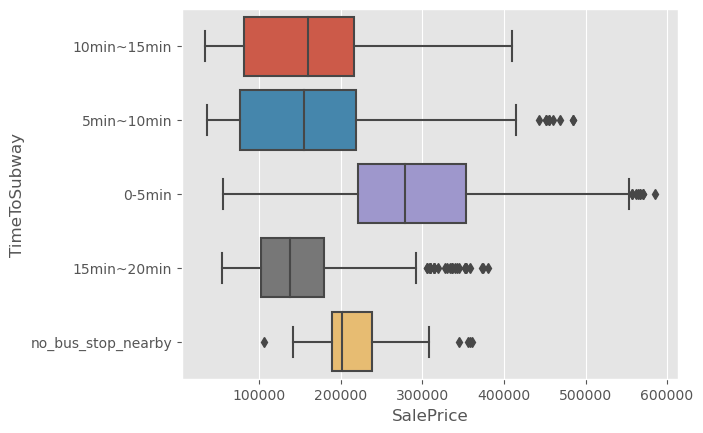

In [140]:
sns.boxplot(data=df, x='SalePrice', y='TimeToSubway', orient='h')
plt.show()

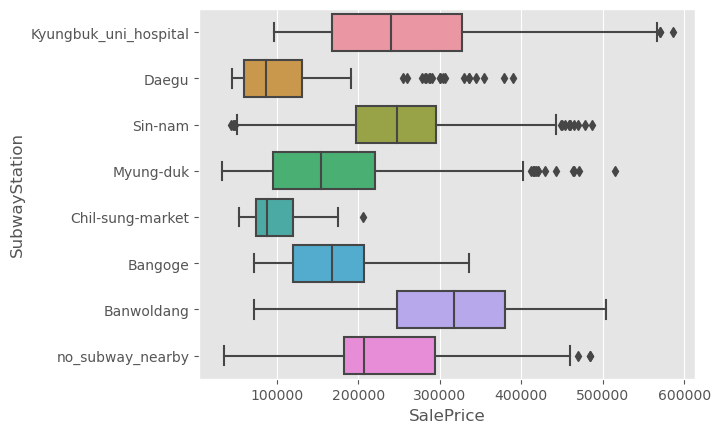

In [141]:
sns.boxplot(data=df, x='SalePrice', y='SubwayStation', orient='h')
plt.show()

<Axes: >

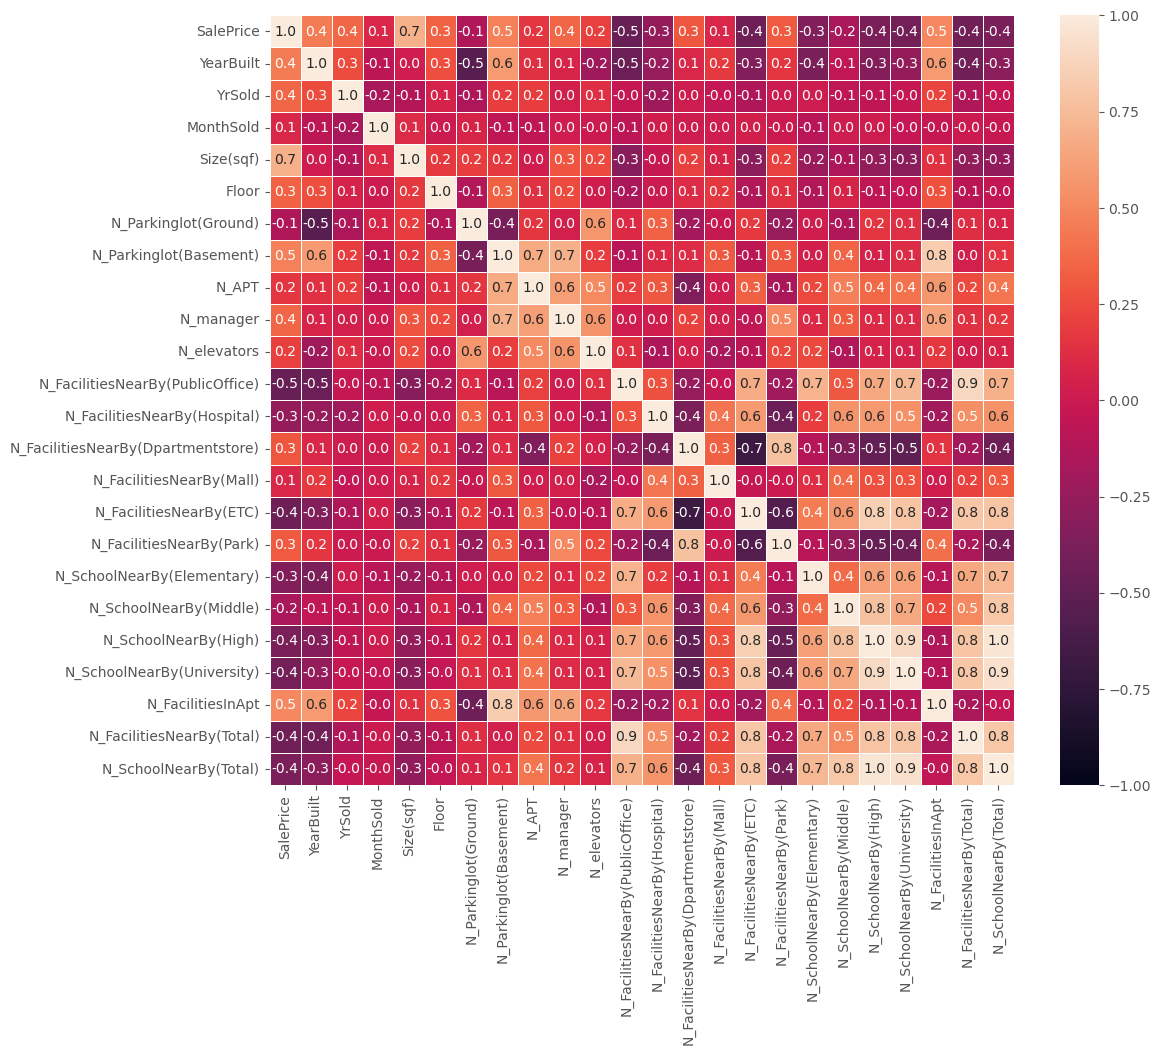

In [142]:
plt.figure(figsize=(12,10))
correlacao_total = df.corr()
sns.heatmap(correlacao_total, vmin = -1, vmax= 1,
           annot=True,
           fmt=".1f",
           linewidth=.4)

In [143]:
correlacao_total.iloc[0].sort_values(ascending=False)

SalePrice                             1.000000
Size(sqf)                             0.697199
N_FacilitiesInApt                     0.505282
N_Parkinglot(Basement)                0.473252
YearBuilt                             0.447875
N_manager                             0.358329
YrSold                                0.357682
Floor                                 0.336729
N_FacilitiesNearBy(Park)              0.310906
N_FacilitiesNearBy(Dpartmentstore)    0.295732
N_elevators                           0.208248
N_APT                                 0.162684
N_FacilitiesNearBy(Mall)              0.082979
MonthSold                             0.081924
N_Parkinglot(Ground)                 -0.130549
N_SchoolNearBy(Middle)               -0.166439
N_FacilitiesNearBy(Hospital)         -0.257282
N_SchoolNearBy(Elementary)           -0.341186
N_SchoolNearBy(High)                 -0.371840
N_SchoolNearBy(Total)                -0.377904
N_SchoolNearBy(University)           -0.403080
N_FacilitiesN

In [144]:
num_maiores_corr = correlacao_total.iloc[0].sort_values(ascending=False)[:5]
num_maiores_corr.index

Index(['SalePrice', 'Size(sqf)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)',
       'YearBuilt'],
      dtype='object')

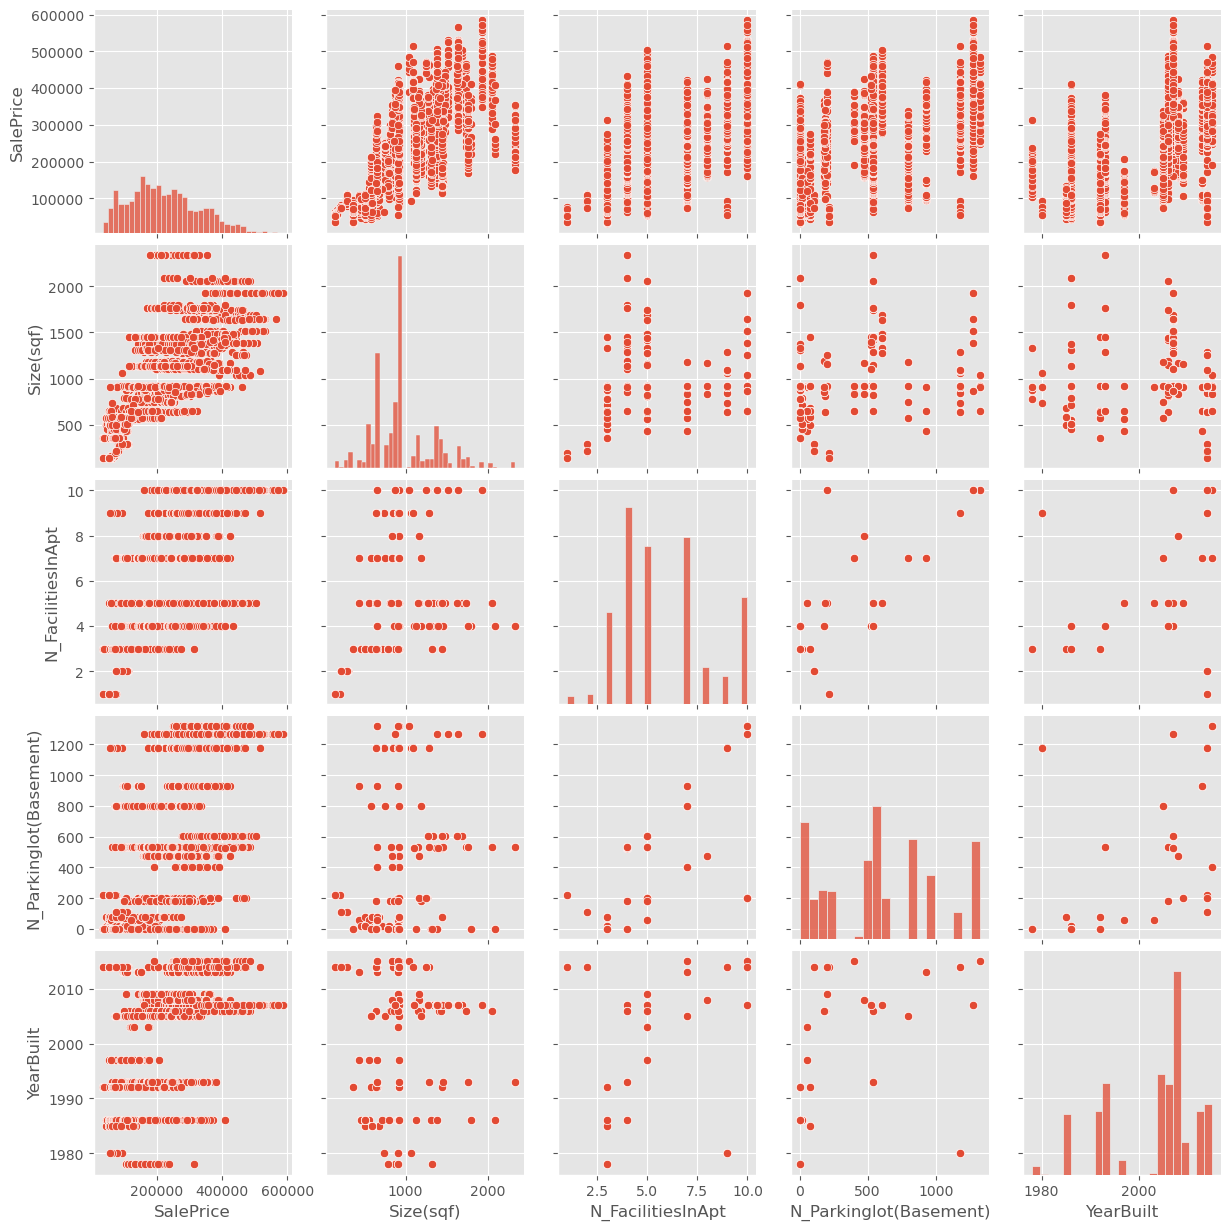

In [145]:
df_numericas_corr = df[num_maiores_corr.index]
sns.pairplot(df_numericas_corr)
plt.show();

In [146]:
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

In [147]:
X.shape, y.shape

((5891, 29), (5891,))

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [149]:
X_train.shape, y_train.shape

((4712, 29), (4712,))

In [150]:
X_test.shape, y_test.shape

((1179, 29), (1179,))

In [151]:
categoricas

['HallwayType',
 'HeatingType',
 'AptManageType',
 'TimeToBusStop',
 'TimeToSubway',
 'SubwayStation']

In [153]:
numericas = list(numericas)
numericas.remove('SalePrice')

In [154]:
numericas

['YearBuilt',
 'YrSold',
 'MonthSold',
 'Size(sqf)',
 'Floor',
 'N_Parkinglot(Ground)',
 'N_Parkinglot(Basement)',
 'N_APT',
 'N_manager',
 'N_elevators',
 'N_FacilitiesNearBy(PublicOffice)',
 'N_FacilitiesNearBy(Hospital)',
 'N_FacilitiesNearBy(Dpartmentstore)',
 'N_FacilitiesNearBy(Mall)',
 'N_FacilitiesNearBy(ETC)',
 'N_FacilitiesNearBy(Park)',
 'N_SchoolNearBy(Elementary)',
 'N_SchoolNearBy(Middle)',
 'N_SchoolNearBy(High)',
 'N_SchoolNearBy(University)',
 'N_FacilitiesInApt',
 'N_FacilitiesNearBy(Total)',
 'N_SchoolNearBy(Total)']

In [201]:
cat_transformer = Pipeline(steps=[
    ('target encoder',OneHotEncoder())
])

num_transformer = Pipeline(steps=[
    ('standard scaler',MinMaxScaler())
])

preprocessing = ColumnTransformer(transformers=[
    ('cat', cat_transformer, categoricas),
    ('num', num_transformer, numericas)
])

In [205]:
modelos = [LinearRegression(),
          DecisionTreeRegressor(),
          RandomForestRegressor(),
          SVR(),
          LogisticRegression()]


for modelo in modelos:
    pipe = Pipeline(steps=[('preprocessing',preprocessing),
                          ('modelos',modelo)])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(modelo)
    print(f"MSE : {mean_squared_error(y_test,y_pred):.3f}")
    print(f"R2 : {r2_score(y_test,y_pred):.3f}\n\n")

LinearRegression()
MSE : 1250670219.121
R2 : 0.882


DecisionTreeRegressor()
MSE : 448844570.014
R2 : 0.958


RandomForestRegressor()
MSE : 246500331.407
R2 : 0.977


SVR()
MSE : 10689926075.851
R2 : -0.011


LogisticRegression()
MSE : 3797753358.955
R2 : 0.641




C:\Users\SAMSUNG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
